## Naive Bayes Algorithm

Il s'agit d'un algorithme de classification probabiliste basé sur le théorème de $Thomas Bayes$ qui repose sur une $supposition$ $naïve$ selon laquelle les features d'un exemple sont indépendantes les unes des autres.

$Fonctionnement$

Cet algorithme reponse sur le théorme qui s'exprime comme suit

### $P(target|features)$ = $\dfrac{P(features|target)*P(target)}{P(features)}$

la supposition : $\prod_{i=a}^{z} P(features=x_{i}|target=y_{t})$ $y_{t} \in {\{k1,k2,...K\}}$


## Utilité

Cet algorithme est utilisé pour la classification, en particulier dans les domaines tels que le filtrage de spam, la catégorisation des textes, etc.

## Avantages
- facilité d'implémentation
- Efficacité avec des données à grande dimension
- Bonne performance dans de nombreux scénarios

## Inconvenients

- supposition d'indépendance
- Problème de probabilités nulles
- Performance inférieure avec des données correlés


## Dataset
https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners/input

Ce cas d'étude s'attèle à prédire si un patient est Diabétique ou non


## Librairies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Aperçu du dataset

In [50]:
data = pd.read_csv("./diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Visualisation de la répartition de la variable dépendante

<Axes: xlabel='Outcome', ylabel='Count'>

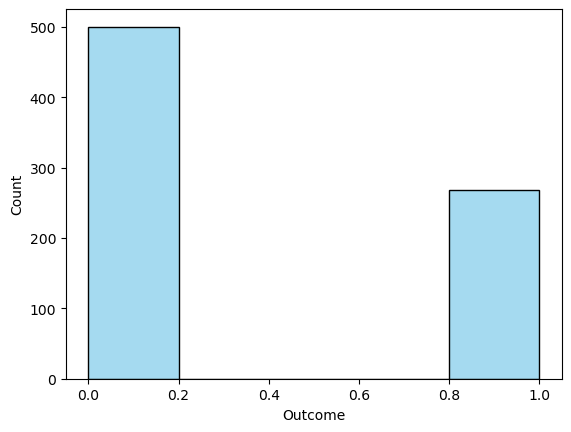

In [13]:
sns.histplot(data.Outcome,bins=5, kde=False, color='skyblue', edgecolor='black')

## Recherche des éventuels corrélations entre les variables indépendantes (features)

In [16]:
correlations = data.iloc[:,:-1].corr(method="pearson")
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

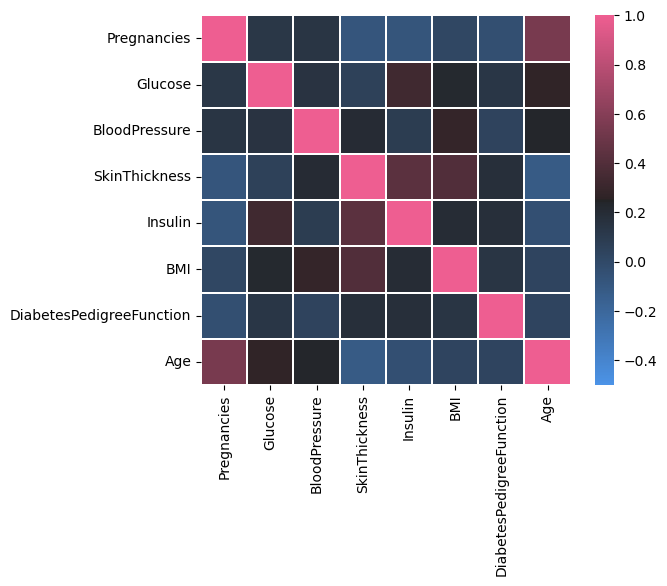

In [15]:
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(correlations,vmax=1,vmin=-.5,cmap=cmap,square=True,linewidths=.2)

In [45]:
columns = data.columns
columns = list(columns)[:-1]


## Visualisation des distributions de chaque feature

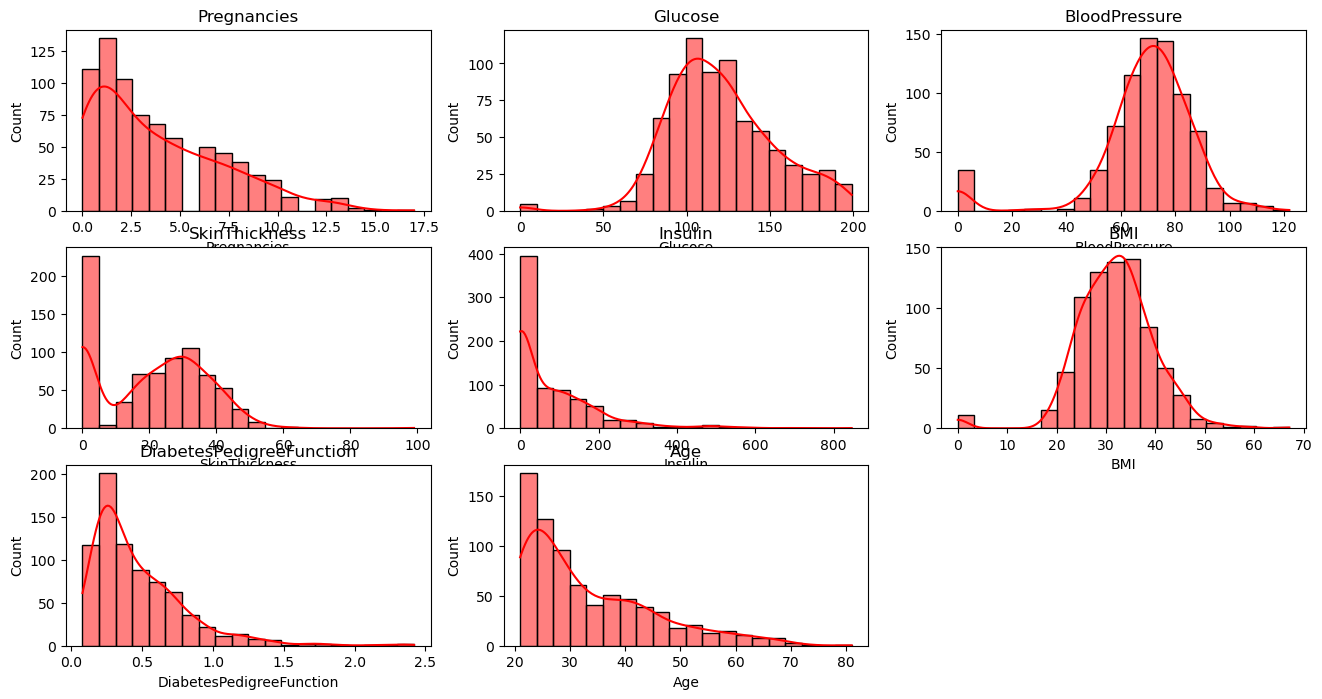

In [44]:
plt.figure(figsize=(16,8))
for i,column in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data[column],bins=20, kde=True, color='red', edgecolor='black')
    plt.title(column)

## Construction du modèle

In [183]:
class NaiveBayesclassifier:
    def __init__(self,df,X,Y):
        self.prior = {}
        self.df = df
        self.X = X.iloc[:,:-1].values
        self.Y = Y
        self.labels = sorted(list(self.df[self.Y].unique()))
        self.classes_count = self.df[self.Y].value_counts()
        
        for idx,count in enumerate(self.classes_count):
            self.prior[idx] = count/len(self.df)
            
    def likelihood(self,feat_name,feat_val,label):
        df = self.df[self.df[self.Y]==label]
        mean,std = df[feat_name].mean(),df[feat_name].std()
        
        return (1/(std*np.sqrt(2*np.pi)))*np.exp(-(feat_val-mean)**2 /(2*std**2))
    
    
    def predictions(self):
        features = list(self.df.columns)[:-1]
        
        Y_pred = []
        for x in self.X:
            likelihoods = [1]*len(self.labels)
            for j in range(len(self.labels)):
                for i in range(len(features)):
                    likelihoods[j]*=self.likelihood(features[i],x[i],self.labels[j])
            
            post_prob = [1]*len(self.labels)
            for j in range(len(self.labels)):
                post_prob[j] = likelihoods[j]*self.prior[j]
            
            Y_pred.append(np.argmax(post_prob))
        
        return np.array(Y_pred)
            
    

In [186]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size=.2,random_state=41)

In [187]:
clf = NaiveBayesclassifier(train_data,test_data,'Outcome')

In [188]:
preds = clf.predictions() 

In [189]:
Y_test = test_data.iloc[:,-1]
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(Y_test,preds))

[[82 17]
 [22 33]]


In [191]:
f1_score(Y_test,preds)*100

62.857142857142854